In [ ]:
# Step 1: Set up your environment
import os
from google.colab import drive
drive.mount('/content/drive/')
cwd="/content/drive/MyDrive/Spoken_Project/PS_Accents"
os.chdir(cwd)

Mounted at /content/drive/


# **SVM**

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters: {'C': 0.05, 'kernel': 'linear'}
Best cross-validation score: 0.74
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.67      0.67      0.67         3
           2       1.00      1.00      1.00         3
           3       0.50      0.67      0.57         3

    accuracy                           0.75        12
   macro avg       0.79      0.75      0.76        12
weighted avg       0.79      0.75      0.76        12



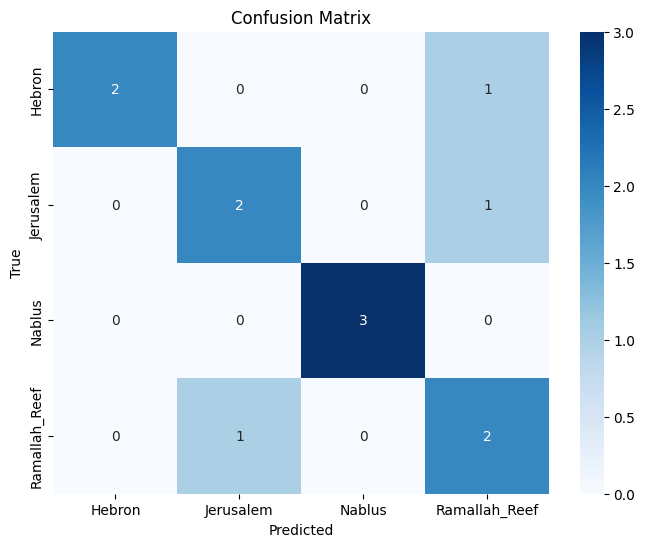

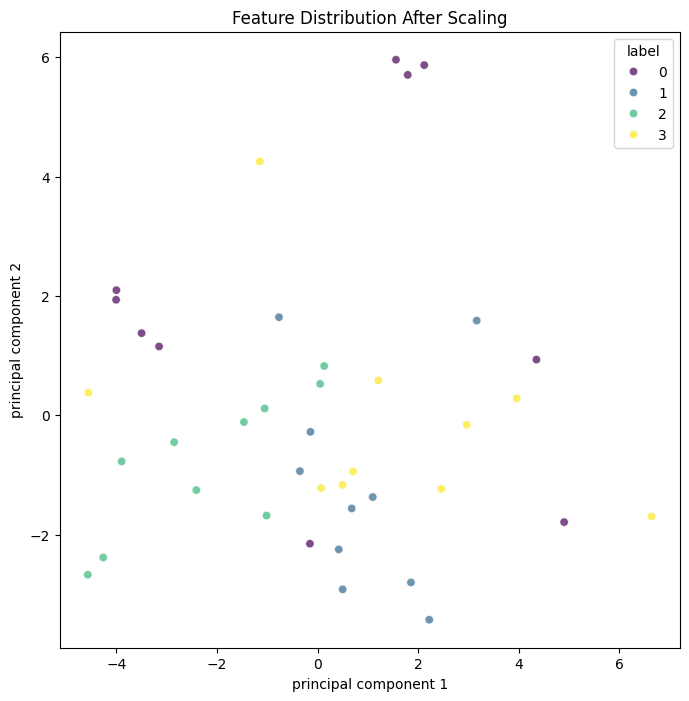

Accuracy Score: 0.75


In [ ]:
# Step 2: Import necessary libraries
import librosa
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Step 3: Define the feature extraction function
def extract_extended_features(file_path):
    try:
        audio, sample_rate = librosa.load(file_path, sr=None)
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        return np.mean(mfccs.T, axis=0)
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

# Step 4: Load data and labels from the dataset
def load_data_and_labels(base_path):
    accents = ['Hebron', 'Jerusalem', 'Nablus', 'Ramallah_Reef']
    features, labels = [], []
    for label, accent in enumerate(accents):
        accent_path = os.path.join(base_path, accent)
        for filename in os.listdir(accent_path):
            file_path = os.path.join(accent_path, filename)
            if file_path.endswith('.wav'):
                feature = extract_extended_features(file_path)
                if feature is not None:
                    features.append(feature)
                    labels.append(label)
    return np.array(features), np.array(labels)

base_path = '/content/drive/My Drive/Spoken_Project/PS_Accents'
features, labels = load_data_and_labels(base_path)

# Step 5: Normalize and select features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
selector = SelectKBest(f_classif, k=30)
features_selected = selector.fit_transform(features_scaled, labels)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_selected, labels, test_size=0.3, random_state=42, stratify=labels)

# Step 6: Cross-validation and SVM parameter tuning
params = {'C': [0.01, 0.05, 0.1], 'kernel': ['linear']}
svm = SVC(probability=True)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(svm, params, cv=cv, verbose=1, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

# Step 7: Evaluate the model using the best parameters
predictions = best_model.predict(X_test)
print(classification_report(y_test, predictions))

# Confusion Matrix Visualization
def plot_confusion_matrix(y_true, y_pred, accents):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=accents, yticklabels=accents)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(y_test, predictions, ['Hebron', 'Jerusalem', 'Nablus', 'Ramallah_Reef'])

# Visualization of features before and after model training
def visualize_performance(features_scaled, labels, model):
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(features_scaled)
    principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])
    finalDf = pd.concat([principalDf, pd.DataFrame(labels, columns=['label'])], axis=1)

    plt.figure(figsize=(8,8))
    sns.scatterplot(x='principal component 1', y='principal component 2', hue='label', data=finalDf, palette='viridis', alpha=0.7)
    plt.title('Feature Distribution After Scaling')
    plt.show()

visualize_performance(features_scaled, labels, best_model)

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy Score: {accuracy}")


# Test the new data on the model

              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.83      1.00      0.91         5
           2       0.67      0.40      0.50         5
           3       0.50      0.80      0.62         5

    accuracy                           0.70        20
   macro avg       0.75      0.70      0.69        20
weighted avg       0.75      0.70      0.69        20



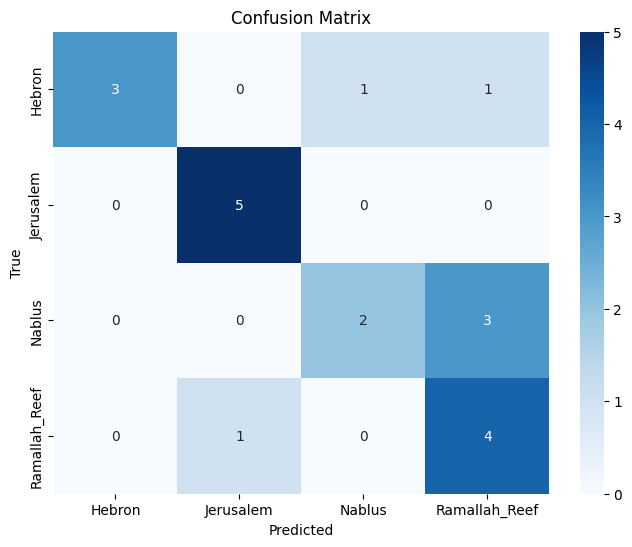

Accuracy Score: 0.7


In [ ]:
# Step 1: Load new data
def load_new_data(new_data_path):
    accents = ['Hebron', 'Jerusalem', 'Nablus', 'Ramallah_Reef']
    features, labels = [], []
    for label, accent in enumerate(accents):
        accent_path = os.path.join(new_data_path, accent)
        for filename in os.listdir(accent_path):
            file_path = os.path.join(accent_path, filename)
            if file_path.endswith('.wav'):
                feature = extract_extended_features(file_path)
                if feature is not None:
                    features.append(feature)
                    labels.append(label)
    return np.array(features), np.array(labels)

# Step 2: Define the feature extraction function
def extract_extended_features(file_path):
    try:
        audio, sample_rate = librosa.load(file_path, sr=None)
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        return np.mean(mfccs.T, axis=0)
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

# Step 3: Process the new data
new_data_path = '/content/drive/My Drive/Spoken_Project/testing data'
new_features, new_labels = load_new_data(new_data_path)
new_features_scaled = scaler.transform(new_features)
new_features_selected = selector.transform(new_features_scaled)

# Step 4: Predict the new data
new_predictions = best_model.predict(new_features_selected)

# Step 5: Print the classification report and confusion matrix
print(classification_report(new_labels, new_predictions))
plot_confusion_matrix(new_labels, new_predictions, ['Hebron', 'Jerusalem', 'Nablus', 'Ramallah_Reef'])

print(f"Accuracy Score: {accuracy_score(new_labels, new_predictions)}")


# **KNN**

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best parameters: {'n_neighbors': 4, 'weights': 'distance'}
Best cross-validation score: 0.7066666666666668
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.40      0.67      0.50         3
           2       0.60      1.00      0.75         3
           3       0.00      0.00      0.00         3

    accuracy                           0.50        12
   macro avg       0.50      0.50      0.44        12
weighted avg       0.50      0.50      0.44        12



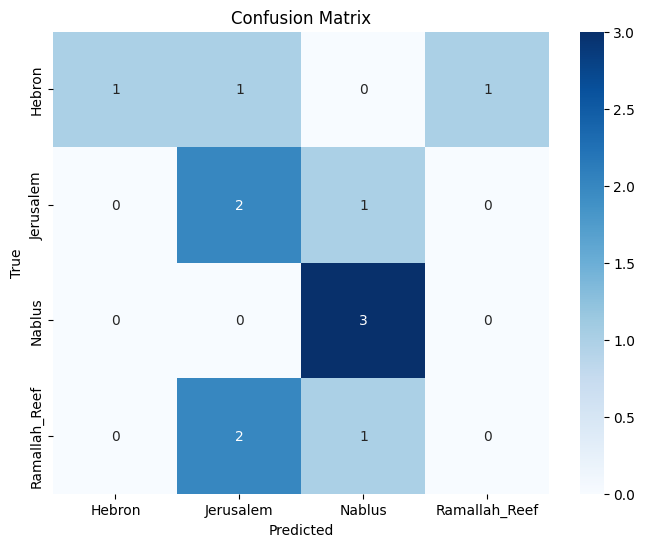

Accuracy Score: 0.5


In [ ]:
# Step 2: Import necessary libraries
import librosa
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Step 3: Define the feature extraction function
def extract_extended_features(file_path):
    try:
        audio, sample_rate = librosa.load(file_path, sr=None)
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        return np.mean(mfccs.T, axis=0)
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

# Step 4: Load data and labels from the dataset
def load_data_and_labels(base_path):
    accents = ['Hebron', 'Jerusalem', 'Nablus', 'Ramallah_Reef']
    features, labels = [], []
    for label, accent in enumerate(accents):
        accent_path = os.path.join(base_path, accent)
        for filename in os.listdir(accent_path):
            file_path = os.path.join(accent_path, filename)
            if file_path.endswith('.wav'):
                feature = extract_extended_features(file_path)
                if feature is not None:
                    features.append(feature)
                    labels.append(label)
    return np.array(features), np.array(labels)

base_path = '/content/drive/My Drive/Spoken_Project/PS_Accents'
features, labels = load_data_and_labels(base_path)

# Step 5: Normalize and select features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
selector = SelectKBest(f_classif, k=35)
features_selected = selector.fit_transform(features_scaled, labels)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_selected, labels, test_size=0.3, random_state=42, stratify=labels)

# Step 6: Cross-validation and KNN parameter tuning
params = {'n_neighbors': [4], 'weights': ['uniform', 'distance']}
knn = KNeighborsClassifier()
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(knn, params, cv=cv, verbose=1, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

# Step 7: Evaluate the model using the best parameters
predictions = best_model.predict(X_test)
print(classification_report(y_test, predictions))

# Confusion Matrix Visualization
def plot_confusion_matrix(y_true, y_pred, accents):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=accents, yticklabels=accents)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(y_test, predictions, ['Hebron', 'Jerusalem', 'Nablus', 'Ramallah_Reef'])



accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy Score: {accuracy}")
